In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

In [ ]:
# Click Models (PBM, Cascade, Random)
import numpy as np

class ClickModels:
    def __init__(self, num_positions):
        self.num_positions = num_positions

    def pbm(self, relevance_scores):
        """Simulates clicks using the Position-Based Model (PBM)."""
        click_probs = relevance_scores
        clicks = np.random.binomial(1, click_probs)
        return clicks

    def cascade(self, relevance_scores):
        """Simulates clicks using the Cascade Model."""
        clicks = np.zeros_like(relevance_scores)
        for i in range(len(relevance_scores)):
            if np.random.rand() < relevance_scores[i]:
                clicks[i] = 1
                break  # Stop examining further positions after a click
        return clicks

    def random_model(self, relevance_scores):  # Define random_model method
        """Simulates clicks using a random model."""
        click_probs = np.random.rand(len(relevance_scores))  # Random probabilities
        clicks = np.random.binomial(1, click_probs)  # Simulate clicks
        return clicks

In [ ]:
class EvaluationMetrics:
    @staticmethod
    def calculate_ctr(click_data, num_impressions):
        """Click-Through Rate by Position."""
        return click_data / num_impressions

    @staticmethod
    def calculate_ndcg(relevance_scores, predicted_clicks):
        """Normalized Discounted Cumulative Gain."""
        def dcg(scores):
            return sum((score / np.log2(i + 2)) for i, score in enumerate(scores))

        ideal_dcg = dcg(sorted(relevance_scores, reverse=True))
        actual_dcg = dcg(predicted_clicks)
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    @staticmethod
    def calculate_mse(actual, predicted):
        """Mean Squared Error."""
        return mean_squared_error(actual, predicted)

    @staticmethod
    def calculate_correlation(real_clicks, predicted_clicks):
        """Calculate Pearson and Spearman correlation coefficients."""
        pearson_corr, _ = pearsonr(real_clicks.flatten(), predicted_clicks.flatten())
        spearman_corr, _ = spearmanr(real_clicks.flatten(), predicted_clicks.flatten())
        return pearson_corr, spearman_corr

In [ ]:
# Data simulation and visualization
def simulate_click_data(model, relevance_scores):
    """Simulates clicks based on a given model."""
    click_data = np.zeros_like(relevance_scores)
    for i in range(relevance_scores.shape[0]):
        click_data[i] = model(relevance_scores[i])
    return click_data

In [ ]:
def visualize_metrics(real_clicks, predicted_clicks, metric_name):
    """Visualize real vs predicted click distributions."""
    positions = np.arange(1, real_clicks.shape[1] + 1)
    avg_real_clicks = real_clicks.mean(axis=0)
    avg_predicted_clicks = predicted_clicks.mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(positions, avg_real_clicks, label="Real Clicks", marker='o')
    plt.plot(positions, avg_predicted_clicks, label="Predicted Clicks", marker='x')
    plt.title(f"{metric_name}: Real vs Predicted")
    plt.xlabel("Position")
    plt.ylabel("Average Click Probability")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
# Evaluation of click models
def evaluate_models(real_data, num_queries=1000, num_positions=10):
    models = ClickModels(num_positions)
    metrics = EvaluationMetrics()

    real_relevance, real_clicks = real_data
    pbm_clicks = simulate_click_data(models.pbm, real_relevance)
    cascade_clicks = simulate_click_data(models.cascade, real_relevance)
    random_clicks = simulate_click_data(models.random_model, real_relevance)

    # Visualization
    visualize_metrics(real_clicks, pbm_clicks, "PBM")
    visualize_metrics(real_clicks, cascade_clicks, "Cascade")
    visualize_metrics(real_clicks, random_clicks, "Random")

    # Correlation and MSE
    pbm_mse = metrics.calculate_mse(real_clicks, pbm_clicks)
    cascade_mse = metrics.calculate_mse(real_clicks, cascade_clicks)
    random_mse = metrics.calculate_mse(real_clicks, random_clicks)

    pbm_corr = metrics.calculate_correlation(real_clicks, pbm_clicks)
    cascade_corr = metrics.calculate_correlation(real_clicks, cascade_clicks)
    random_corr = metrics.calculate_correlation(real_clicks, random_clicks)

    print("\nModel Evaluation Results:")
    print(f"PBM: MSE={pbm_mse:.4f}, Pearson Corr={pbm_corr[0]:.4f}, Spearman Corr={pbm_corr[1]:.4f}")
    print(f"Cascade: MSE={cascade_mse:.4f}, Pearson Corr={cascade_corr[0]:.4f}, Spearman Corr={cascade_corr[1]:.4f}")
    print(f"Random: MSE={random_mse:.4f}, Pearson Corr={random_corr[0]:.4f}, Spearman Corr={random_corr[1]:.4f}")



In [ ]:
# Real-world dataset simulation
def real_data_simulation(num_queries=100, num_positions=10):
    relevance_scores = np.random.rand(num_queries, num_positions)  # Simulated relevance scores
    click_data = np.random.rand(num_queries, num_positions)  # Simulated user click data
    return relevance_scores, click_data


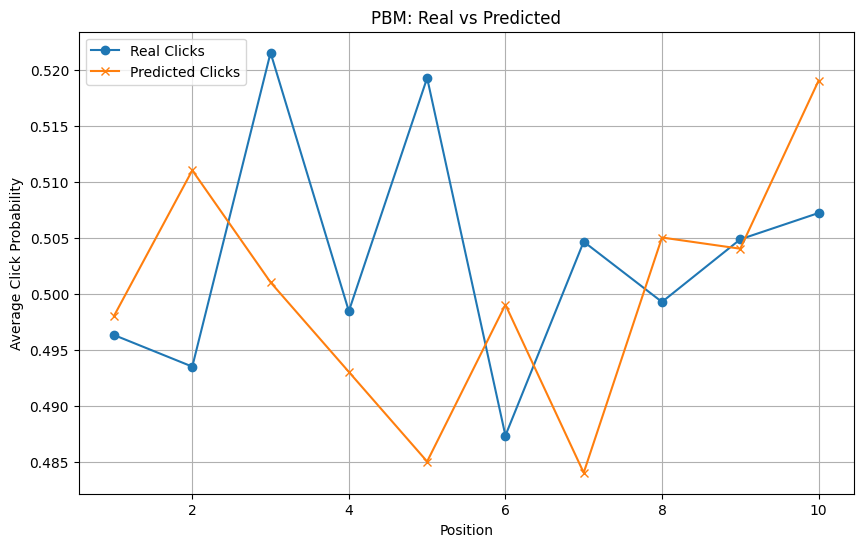

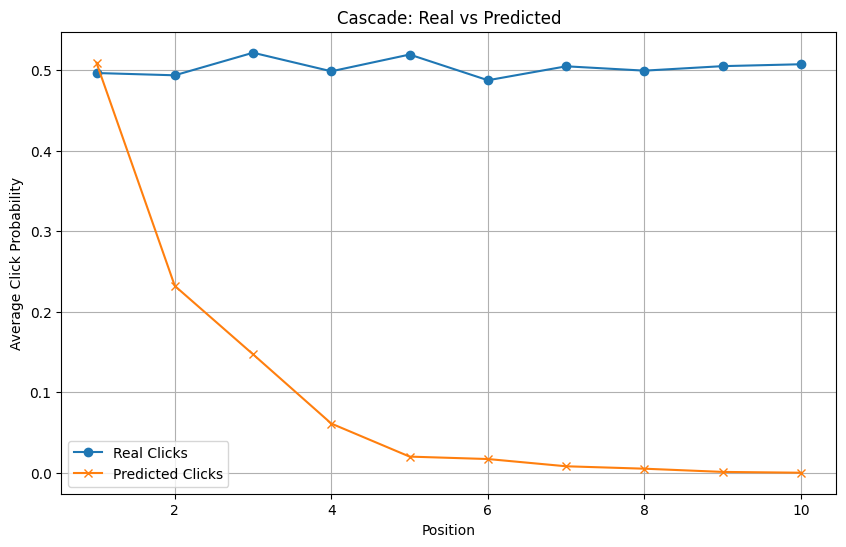

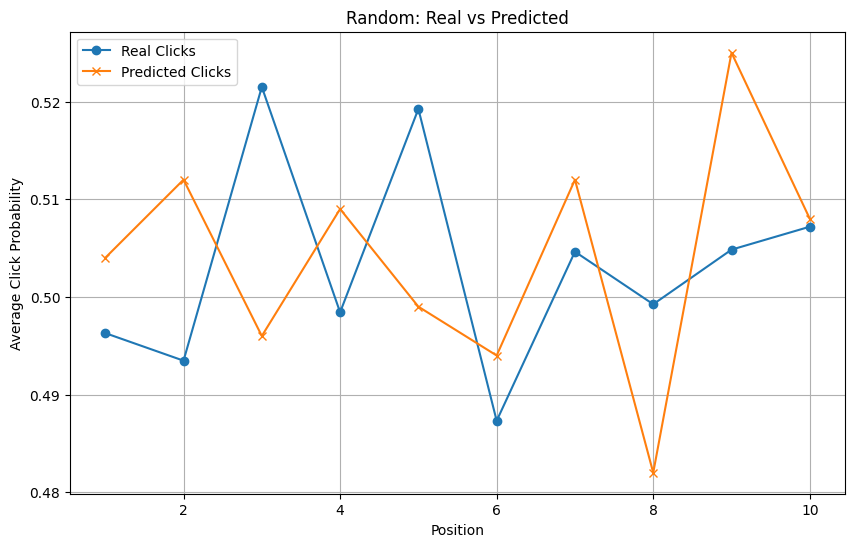


Model Evaluation Results:
PBM: MSE=0.3315, Pearson Corr=0.0072, Spearman Corr=0.0072
Cascade: MSE=0.3347, Pearson Corr=0.0084, Spearman Corr=0.0084
Random: MSE=0.3332, Pearson Corr=0.0012, Spearman Corr=0.0010


In [ ]:
# Run evaluation
if __name__ == "__main__":
    num_queries = 1000
    num_positions = 10
    real_data = real_data_simulation(num_queries, num_positions)
    evaluate_models(real_data, num_queries, num_positions)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Utility function to simulate click data for PBM
def simulate_pbm_clicks(n_queries, n_positions, relevance_probs, position_bias):
    clicks = []
    for _ in range(n_queries):
        query_clicks = []
        for pos in range(n_positions):
            relevance = np.random.rand() < relevance_probs[pos]
            bias = np.random.rand() < position_bias[pos]
            query_clicks.append(int(relevance and bias))
        clicks.append(query_clicks)
    return np.array(clicks)

# Utility function to simulate click data for Cascade Model
def simulate_cascade_clicks(n_queries, n_positions, relevance_probs):
    clicks = []
    for _ in range(n_queries):
        query_clicks = [0] * n_positions
        for pos in range(n_positions):
            if np.random.rand() < relevance_probs[pos]:
                query_clicks[pos] = 1
                break  # Stop after first click in Cascade Model
        clicks.append(query_clicks)
    return np.array(clicks)

# Compute CTR by position
def compute_ctr(clicks):
    return clicks.sum(axis=0) / clicks.shape[0]

# Compute nDCG
def compute_ndcg(clicks, relevance_scores):
    n_queries, n_positions = clicks.shape
    ndcg = 0
    for i in range(n_queries):
        dcg = sum(clicks[i, j] / np.log2(j + 2) for j in range(n_positions))
        idcg = sum(sorted(relevance_scores, reverse=True)[:n_positions] / np.log2(np.arange(2, n_positions + 2)))
        ndcg += dcg / idcg
    return ndcg / n_queries

# Main simulation setup
def main():
    # Parameters
    n_queries = 10000
    n_positions = 10
    relevance_probs = np.linspace(0.9, 0.1, n_positions)
    position_bias = np.linspace(1.0, 0.3, n_positions)

    # Simulate click data for each model
    pbm_clicks = simulate_pbm_clicks(n_queries, n_positions, relevance_probs, position_bias)
    cascade_clicks = simulate_cascade_clicks(n_queries, n_positions, relevance_probs)
    random_clicks = np.random.randint(2, size=(n_queries, n_positions))

    # Evaluation metrics
    ctr_pbm = compute_ctr(pbm_clicks)
    ctr_cascade = compute_ctr(cascade_clicks)
    ctr_random = compute_ctr(random_clicks)

    # Assume some relevance scores for nDCG
    relevance_scores = relevance_probs  # Using probabilities as relevance scores

    ndcg_pbm = compute_ndcg(pbm_clicks, relevance_scores)
    ndcg_cascade = compute_ndcg(cascade_clicks, relevance_scores)
    ndcg_random = compute_ndcg(random_clicks, relevance_scores)

    # Compute MSE against relevance probabilities
    mse_pbm = mean_squared_error(relevance_probs, ctr_pbm)
    mse_cascade = mean_squared_error(relevance_probs, ctr_cascade)
    mse_random = mean_squared_error(relevance_probs, ctr_random)

    # Print Results
    print("CTR by Position:")
    print("PBM:", ctr_pbm)
    print("Cascade:", ctr_cascade)
    print("Random:", ctr_random)

    print("\nnDCG:")
    print("PBM:", ndcg_pbm)
    print("Cascade:", ndcg_cascade)
    print("Random:", ndcg_random)

    print("\nMean Squared Error:")
    print("PBM:", mse_pbm)
    print("Cascade:", mse_cascade)
    print("Random:", mse_random)

if __name__ == "__main__":
    main()


CTR by Position:
PBM: [0.8939 0.7392 0.6094 0.4942 0.3659 0.2824 0.195  0.1207 0.0708 0.0292]
Cascade: [9.001e-01 7.910e-02 1.490e-02 3.900e-03 1.200e-03 2.000e-04 2.000e-04
 1.000e-04 0.000e+00 1.000e-04]
Random: [0.4992 0.5085 0.494  0.4994 0.5063 0.5043 0.5089 0.5021 0.5013 0.4972]

nDCG:
PBM: 0.8300226756943976
Cascade: 0.35362929746099936
Random: 0.8401429866729375

Mean Squared Error:
PBM: 0.017225681962962966
Cascade: 0.2191856320740741
Random: 0.06519879874074073
